In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fake_data = pd.read_csv('./dataset/fake.csv')
true_data = pd.read_csv('./dataset/true.csv')

In [40]:
fake_data.head()

,Unnamed: 0,title,text,subject,date,cleaned_title,title_token,text_token,is_fake
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017","['donald', 'trump', 'sends', 'embarrassing', '...","[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...",1
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017","['drunk', 'bragging', 'trump', 'staffer', 'sta...","[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",1
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017","['sheriff', 'david', 'clarke', 'becomes', 'int...","[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",1
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017","['trump', 'obsessed', 'even', 'obamas', 'name'...","[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...",1
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017","['pope', 'francis', 'called', 'donald', 'trump...","[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",1


In [41]:
true_data.head()

,Unnamed: 0,title,text,subject,date,title_token,text_token,is_fake
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","[us, budget, fight, looms, republicans, flip, ...","[washington, reuters, -, head, conservative, r...",0
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017","[us, military, accept, transgender, recruits, ...","[washington, reuters, -, transgender, people, ...",0
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, -, special, counsel, inv...",0
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017","[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, -, trump, campaign, advi...",0
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017","[trump, wants, postal, service, charge, much, ...","[seattlewashington, reuters, -, president, don...",0


## 간단한 data preprocessing & visualization

In [36]:
import nltk
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JDhyeok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
def data_preprocessing(text):
    
    # punctuation 제거
    text = re.sub("[^-9A-Za-z ]", "" , text)
    text=re.sub("<.*?>", ' ', text) 

    # 소문자 변환
    text = text.lower()
    
    #Tokenization
    tokens = nltk.tokenize.word_tokenize(text)
    
    # stopword 제거
    stopwords = nltk.corpus.stopwords.words('english')
    ret = []
    for w in tokens:
        if w not in stopwords:
            ret.append(w)
    tokens = ret

    # Lemmatization & Stemming
    ps = nltk.PorterStemmer()
    text = [ps.stem(word) for word in tokens]
    
    return tokens

In [38]:
fake_data['title_token'] = fake_data['title'].apply(data_preprocessing)
true_data['title_token'] = true_data['title'].apply(data_preprocessing)

fake_data['text_token'] = fake_data['text'].apply(data_preprocessing)
true_data['text_token'] = true_data['text'].apply(data_preprocessing)

In [39]:
print(fake_data['subject'].unique())
print(true_data['subject'].unique())

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
['politicsNews' 'worldnews']


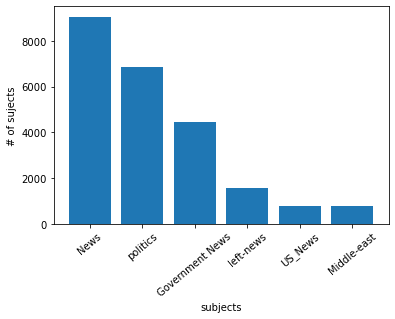

In [97]:
plt.bar(fake_data['subject'].unique(), fake_data['subject'].value_counts())
plt.xlabel('subjects')
plt.ylabel('# of sujects')
plt.xticks(rotation=40)
plt.show()

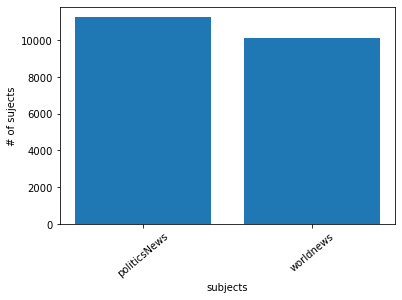

In [98]:
plt.bar(true_data['subject'].unique(), true_data['subject'].value_counts())
plt.xlabel('subjects')
plt.ylabel('# of sujects')
plt.xticks(rotation=40)
plt.show()

In [4]:
# fake_data = pd.read_csv('fake_data.csv')
# true_data = pd.read_csv('true_data.csv')

In [39]:
#!pip install wordcloud

In [34]:
# y label 추가
fake_data['is_fake'] = 1
true_data['is_fake'] = 0
fake_text = fake_data[['title_token','text_token','is_fake']]
true_text = true_data[['title_token','text_token','is_fake']]

In [10]:
from IPython.display import set_matplotlib_formats
import matplotlib
from wordcloud import WordCloud

In [8]:
def token2text(tokens):
    ret = ""
    for w in tokens:
        ret += w
    return ret

In [16]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
fake_text = " ".join(text for text in fake_data['text'])
fake_text = re.sub("[^-9A-Za-z ]", "" , fake_text)
fake_text = text=re.sub("<.*?>", ' ', fake_text) 
fake_text = fake_text.lower()

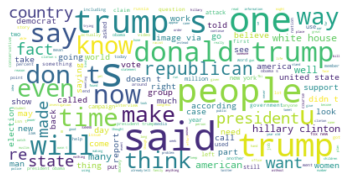

In [24]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(fake_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
true_text = " ".join(text for text in true_data['text'])
true_text = re.sub("[^-9A-Za-z ]", "" , true_text)
true_text = text=re.sub("<.*?>", ' ', true_text) 
true_text = true_text.lower()

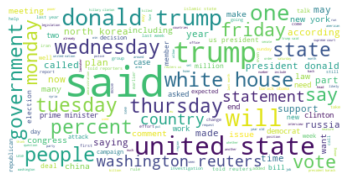

In [25]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(true_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## LDA(Latent Dirichlet Allocation)를 이용한 토픽 모델링

In [27]:
# !pip install gensim
# !pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136870 sha256=29d2848b3d97b4084a5e03b8b13ff22792e092cb89b9185bb4996e77194b407f
  Stored in directory: c:\users\jdhyeok\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\JDhyeok\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [30]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [43]:
# word frequency 구하기
fake_dictionary = corpora.Dictionary(fake_data['text_token'])
true_dictionary = corpora.Dictionary(true_data['text_token'])

fake_corpus = [fake_dictionary.doc2bow(text) for text in fake_data['text_token']]
true_corpus = [true_dictionary.doc2bow(text) for text in true_data['text_token']]

In [44]:
# LDA 모델 훈련 %주의% 매우 매우 오래걸림 실수로 다시실행하는 일 없도록...ㅠ
NUM_TOPICS = 10 # 모델 결과에 따라 변경 가능
fake_news_ldamodel = LdaModel(fake_corpus, num_topics=NUM_TOPICS, id2word=fake_dictionary, passes= 15)
true_news_ldamodel = LdaModel(true_corpus, num_topics=NUM_TOPICS, id2word=true_dictionary, passes= 15)

In [61]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim

C:\Users\JDhyeok\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=032a590d1ebc3ebd7ab12926274c76b85cfac4af8bc90fb13ca7894490276098
  Stored in directory: c:\users\jdhyeok\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [64]:
# Fake News Dataset 에서의 토픽 분포도 (1번 정치색이 많이 들어간 자극적인 요소들이 있는거 같음)
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
fake_news_vis = pyLDAvis.gensim.prepare(fake_news_ldamodel, fake_corpus, fake_dictionary)
pyLDAvis.display(fake_news_vis)

C:\Users\JDhyeok\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# True News Dataset 에서의 토픽 분포도 (fake와는 달리 topic들 골고루 분포해있음)
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
true_news_vis = pyLDAvis.gensim.prepare(true_news_ldamodel, true_corpus, true_dictionary)
pyLDAvis.display(true_news_vis)

C:\Users\JDhyeok\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# 모델 저장
fake_news_ldamodel.save('fake_news_lda.model')
true_news_ldamodel.save('true_news_lda.model')

C:\Users\JDhyeok\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
